### Linear Regression and Boston Data Set

- Load Boston Data Set
- Assign `data` to `X` and `target` to `y`


In [54]:
import pandas as pd
df= pd.read_csv("/content/boston_house_prices.csv")

In [55]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
y = df['MEDV']
X = df.drop('MEDV',axis=1)


- Check the shape of the dataset

In [57]:
df.shape

(506, 14)

- Split the dataset into test and train datasets, you can set the random seed to 42 by `random_state=42`

In [58]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that you can import
```
from sklearn.ensemble import RandomForestRegressor
```

In [59]:
# cross valudation with LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
linear_regressor = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=10)

# Print the mean score
print("Mean cross-validation score for Linear Regression:", np.mean(cv_scores))


Mean cross-validation score for Linear Regression: 0.6986301933640767


In [60]:
# Cross-Validation with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(random_forest_regressor, X_train, y_train, cv=10)

# Print the mean score
print("Mean cross-validation score for Random Forest Regressor:", np.mean(cv_scores_rf))


Mean cross-validation score for Random Forest Regressor: 0.8211604949722642


## Boston Housing Data with Polynomials

- Split the dataset into test and train datasets
- Transform the dataset using polynomial transformation, imputer and scaler
- Run cross validation
- Plot the coefficients of the model

Step 1 & 2: Load the Boston Housing dataset and Split It

In [61]:

# We already did this in the above one

Step 3: Transform the Dataset

In [62]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create a pipeline for transformations
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), # Impute missing values
    PolynomialFeatures(degree=2, include_bias=False), # Polynomial transformation
    StandardScaler() # Feature scaling
)

# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the test data (no fitting!)
X_test_transformed = pipeline.transform(X_test)


Step 4: Run Cross-Validation

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_train_transformed, y_train, cv=10)

# Print the mean cross-validation score
print("Mean cross-validation score:", np.mean(cv_scores))


Mean cross-validation score: 0.8042073305749259


Step 5: Plot the Coefficients of the Model

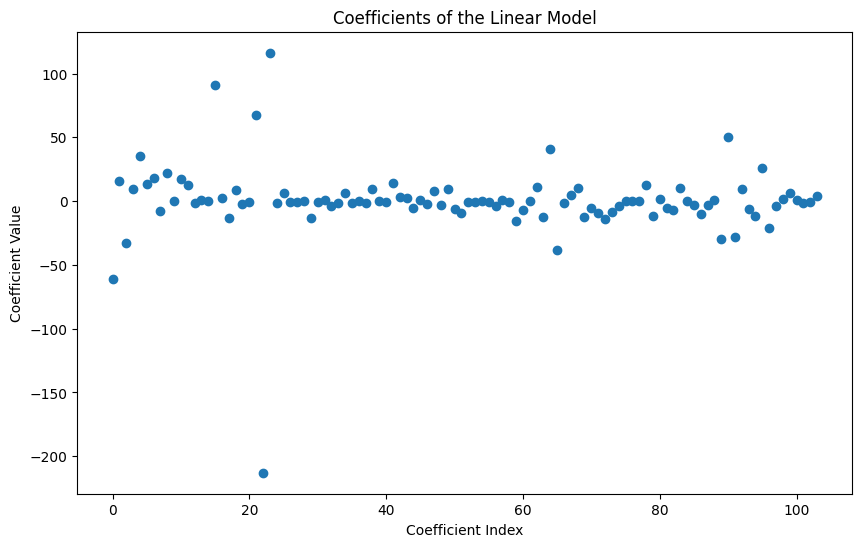

In [64]:
import matplotlib.pyplot as plt

# Fit the model to the transformed training data
linear_model.fit(X_train_transformed, y_train)

# Get the coefficients
coefficients = linear_model.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(coefficients, 'o')
plt.title('Coefficients of the Linear Model')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()
